## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
#from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score,accuracy_score
from sklearn.metrics import accuracy_score
import os,sys
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
from sklearn import metrics
from sklearn import model_selection

In [2]:
#Read Dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
# Shape
df.shape

(5000, 14)

In [7]:
#incorrect imputation Experience min is minus value, so will replace with median
any(df['Experience'] < 0)

True

In [8]:
exp_med = df.loc[:,"Experience"].median()
df.loc[:, 'Experience'].replace([-1,-2,-3], [exp_med,exp_med,exp_med], inplace=True)

In [9]:
any(df['Experience'] < 0)

False

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## 2. EDA: Study the data distribution in each attribute and target variable, share your findings
(20 marks)
 Number of unique in each column?
 Number of people with zero mortgage?
 Number of people with zero credit card spending per month?
 Value counts of all categorical columns.
 Univariate and Bivariate
 Get data model ready

In [80]:
#Number of unique in each column
unique_value = df.nunique()
print(unique_value)

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


0    4520
1     480
Name: Personal Loan, dtype: int64


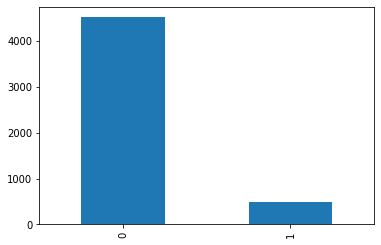

In [81]:
# Number of people with zero mortgage
pd.value_counts(df["Personal Loan"]).plot(kind="bar");
Val = pd.value_counts(df["Personal Loan"])
print(Val)

In [82]:
# Number of people with zero credit card spending per month
temp = sum(df["CCAvg"]== 0)
print('Number of people with zero credit card spending per month = ', temp)

Number of people with zero credit card spending per month =  106


In [11]:
# Value counts of all categorical columns
print('Education : ')
print(df.Education.value_counts())
print('Family : ')
print(df.Family.value_counts())
print('ID : ')
print(df.ID.value_counts())
print('Online : ')
print(df.Online.value_counts())
df_cat_cd_acct = df.rename(columns = {"CD Account" : "CD_Account"})
print('CD Account : ')
print(df_cat_cd_acct.CD_Account.value_counts())
df_cat_sec_acct = df.rename(columns = {"Securities Account" : "Securities_Account"})
print('Securities Account : ')
print(df_cat_sec_acct.Securities_Account.value_counts())
df_cat_cc = df.rename(columns = {"Credit Card" : "CreditCard"})
print('Credit Card : ')
print(df_cat_cc.CreditCard.value_counts())

Education : 
1    2096
3    1501
2    1403
Name: Education, dtype: int64
Family : 
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
ID : 
2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64
Online : 
1    2984
0    2016
Name: Online, dtype: int64
CD Account : 
0    4698
1     302
Name: CD_Account, dtype: int64
Securities Account : 
0    4478
1     522
Name: Securities_Account, dtype: int64
Credit Card : 
0    3530
1    1470
Name: CreditCard, dtype: int64


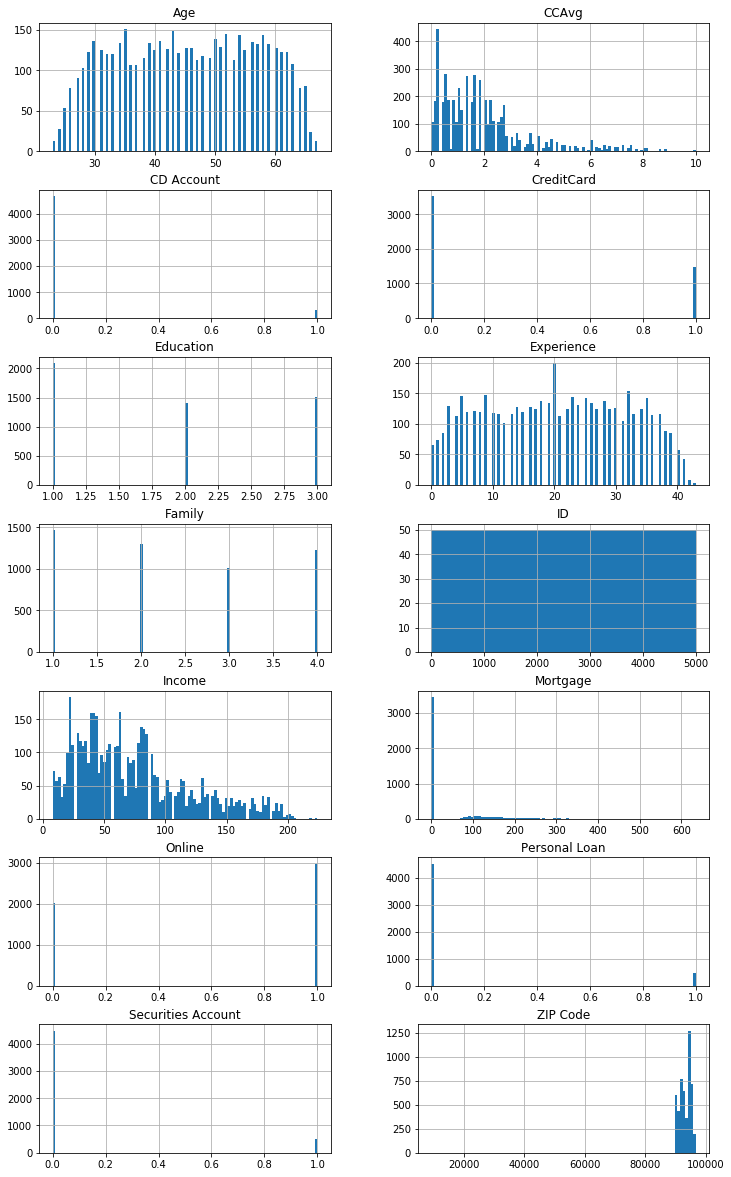

In [138]:
# Univariate and Bivariate 
# Univariate:
  #Individual column exploration
  #how is the distribution of continuous columns or count and % distribution of categorical variables
  #If null values then it should be treated.
  #Try understanding each attribute via distplot, value counts, box plot, etc.

#Bivariate:
  #Try to see how is the relationship of each feature with target variable
  #Use different plots, groupby or crosstabs if necessary

#Individual column exploration
columns = list(df)[0:] 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2)); 

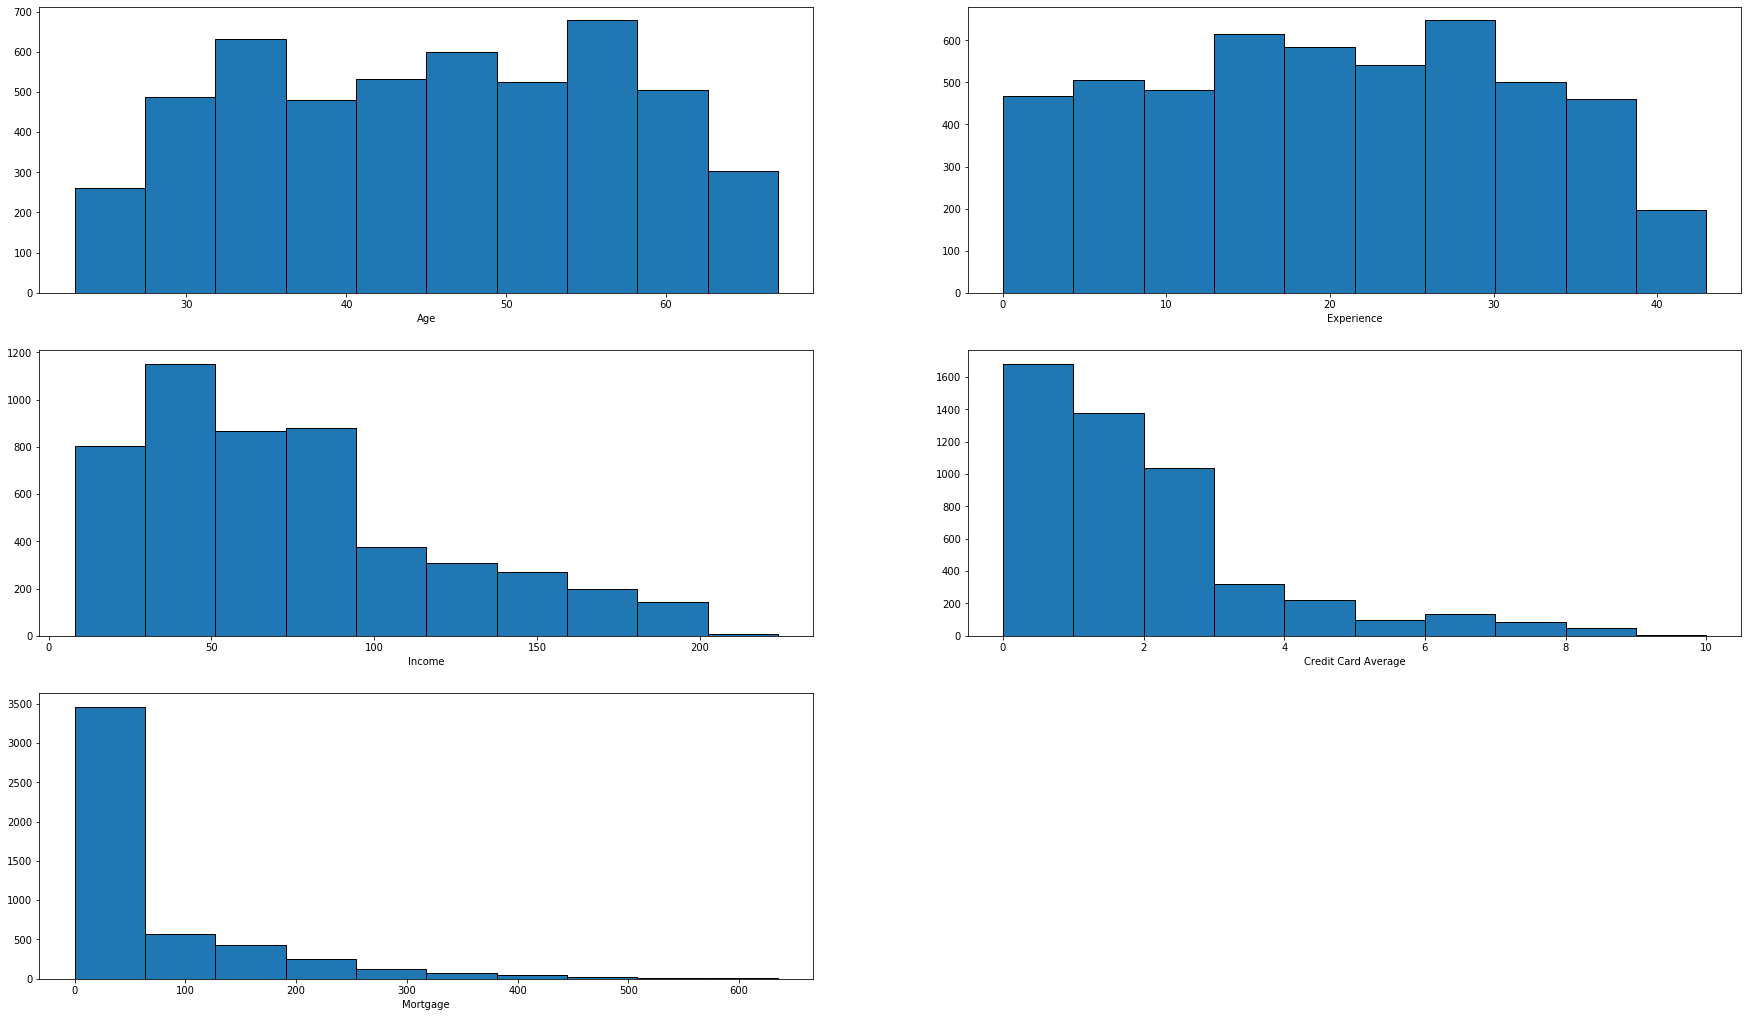

In [17]:
# Univariate Analysis for Continuous Variable
plt.figure(figsize= (30.5,30.5))
plt.subplot(5,2,1)
plt.hist(df.Age, edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,2,2)
plt.hist(df.Experience, edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,2,3)
plt.hist(df.Income, edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,2,4)
plt.hist(df.CCAvg, edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,2,5)
plt.hist(df.Mortgage, edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

### Observation : 
#### Age & Experience seems to be quiet normally distributed
#### Income, CC Average & Mortgage are highly skewed


In [140]:
# Checking for Skewness of data
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.Experience),stats.skew(df.Income),stats.skew(df.CCAvg)
                                      ,stats.skew(df.Mortgage)]},index=['Age','Experience','Income','CCAvg','Mortgage'])
Skewness

# Age and Experience seems to be quiet Symmetrical
# Income, CCAvg and Mortgage are Positively skewed, as they are highly skewed there will be quiet a lot of extreme values

,Skewness
Age,-0.029332
Experience,-0.014096
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


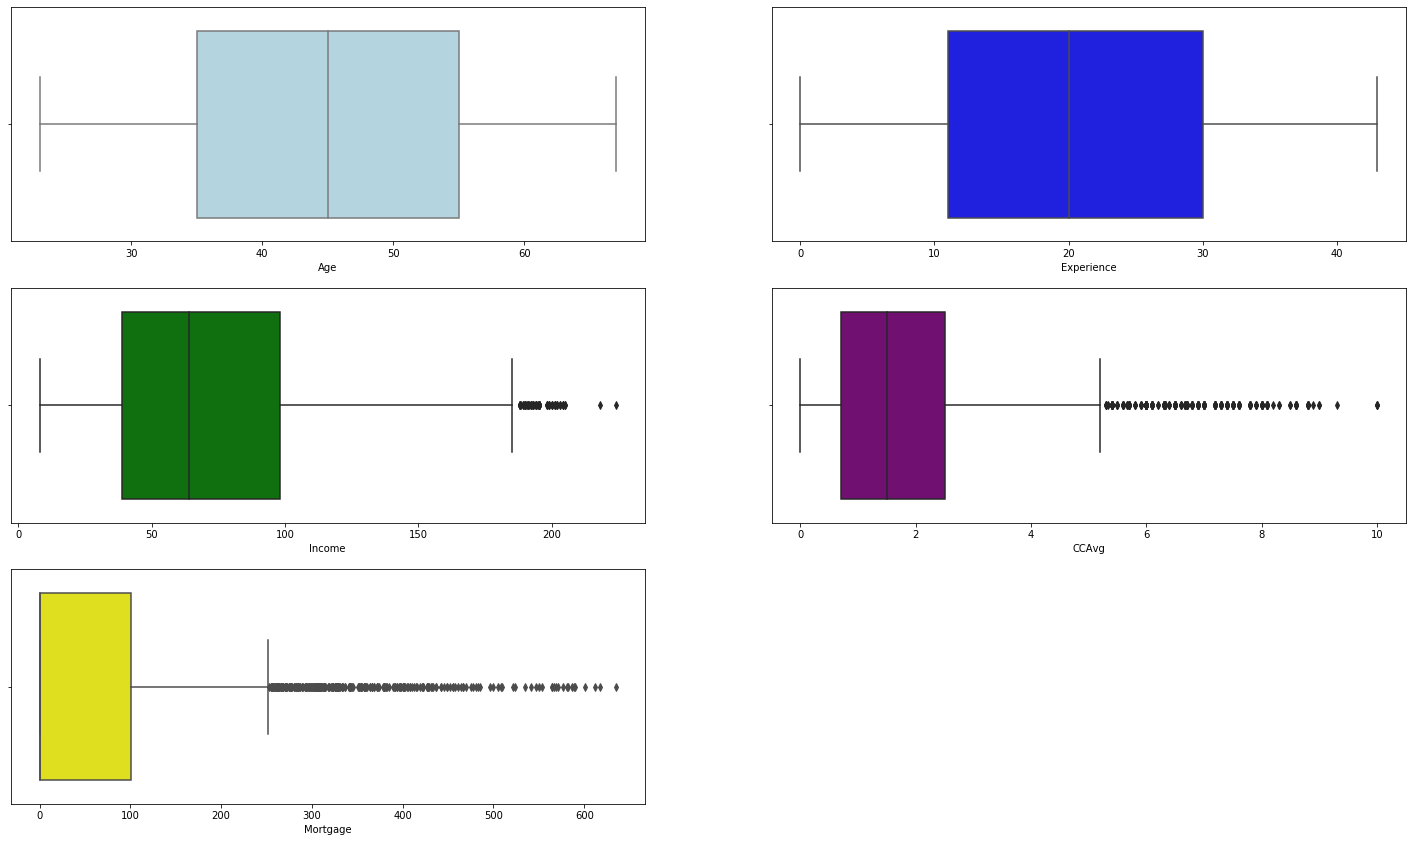

In [18]:
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= df.Age, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= df.Experience, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= df.Income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= df.CCAvg, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= df.Mortgage, color='yellow');

Text(0.5, 1.0, 'Credit Card Distribution')

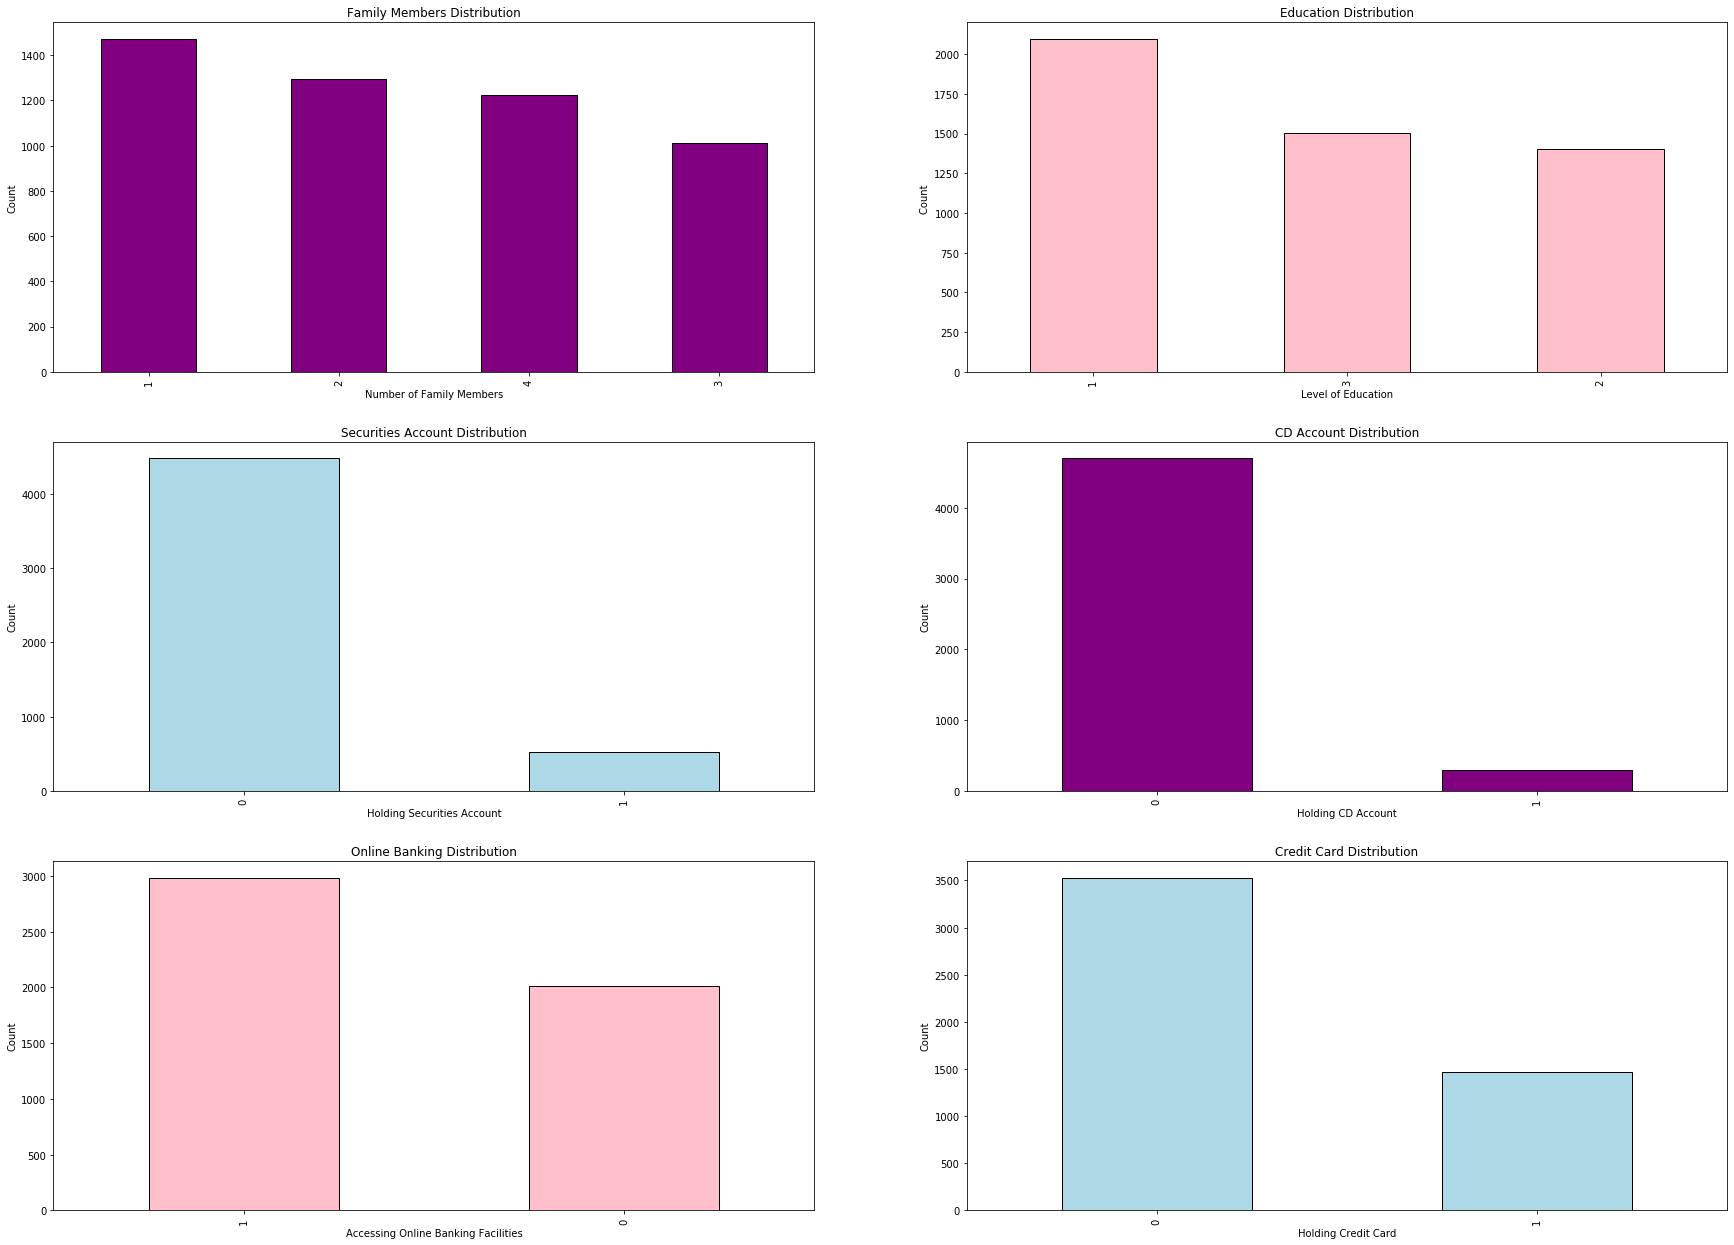

In [19]:
# categorical variables
plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'purple',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'purple',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

#### Analysis : 
#### The variables family and education are ordinal variables. The distribution of families is evenly distributed
#### It seems that many of the population is not holding Securities Account and CD Account, vast difference is visible.
#### More than half of the population does not have credit card.

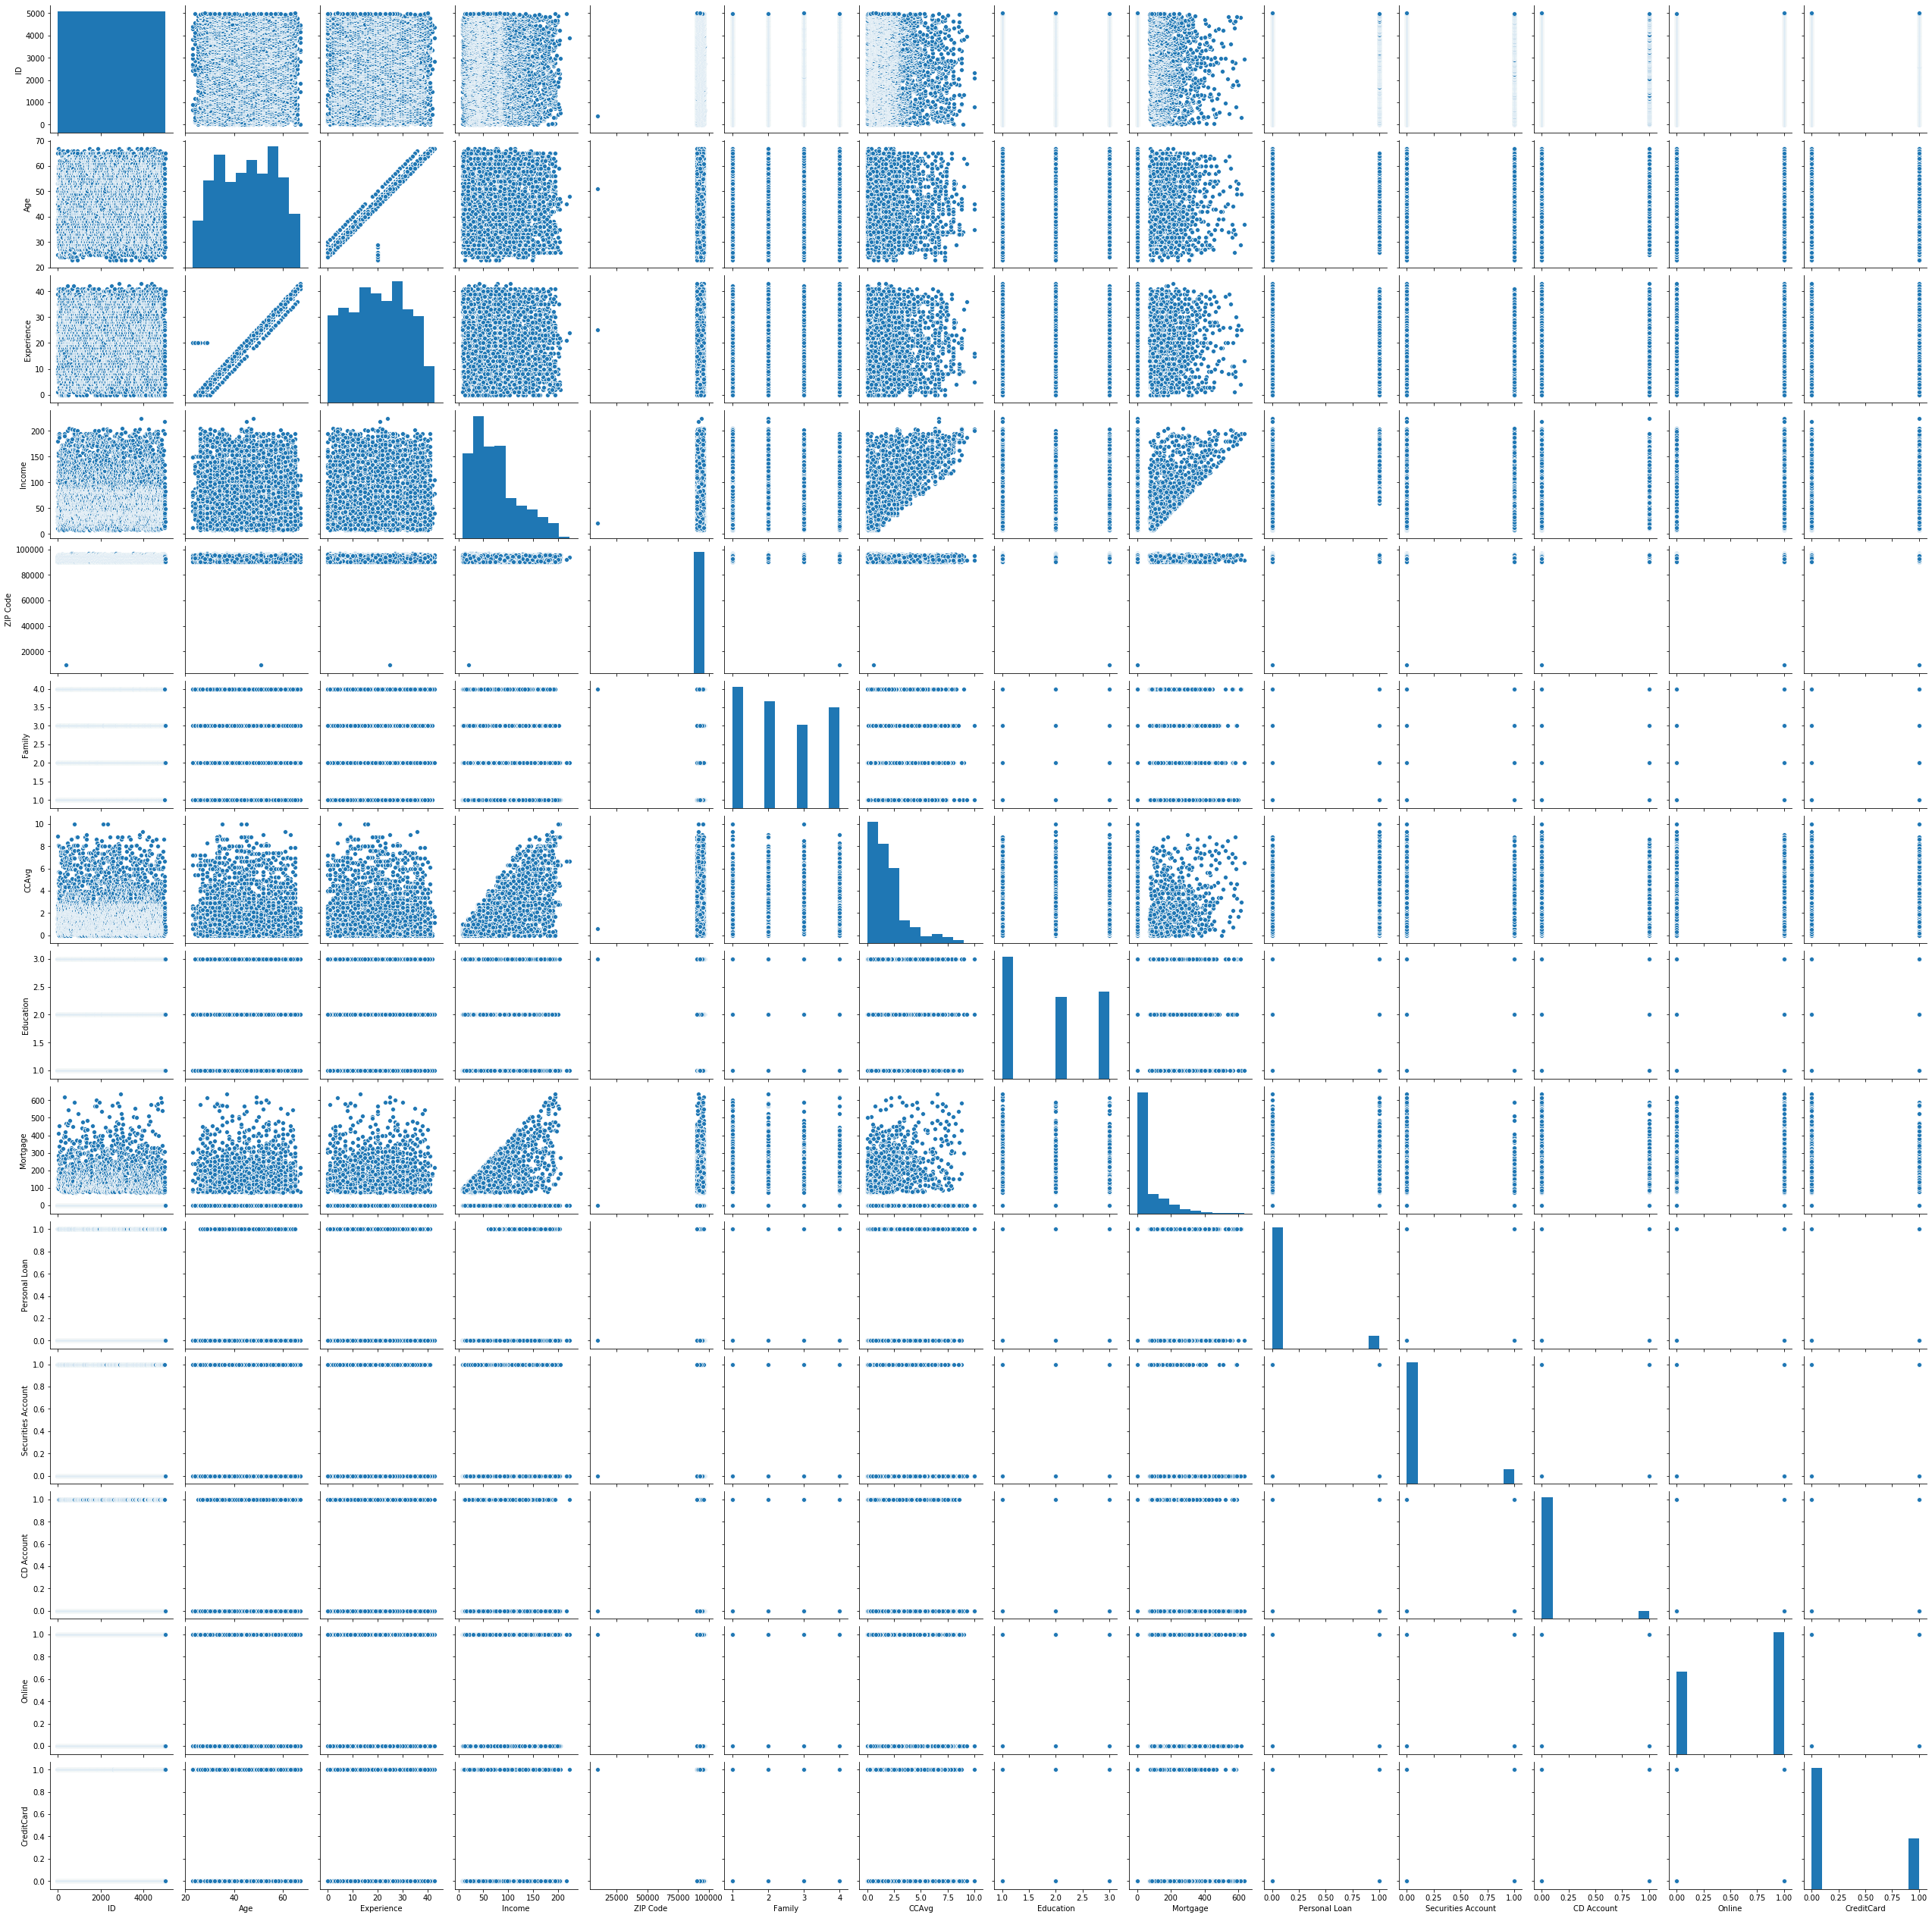

In [147]:
#Pairplot
sns.pairplot(df.iloc[:,:]);

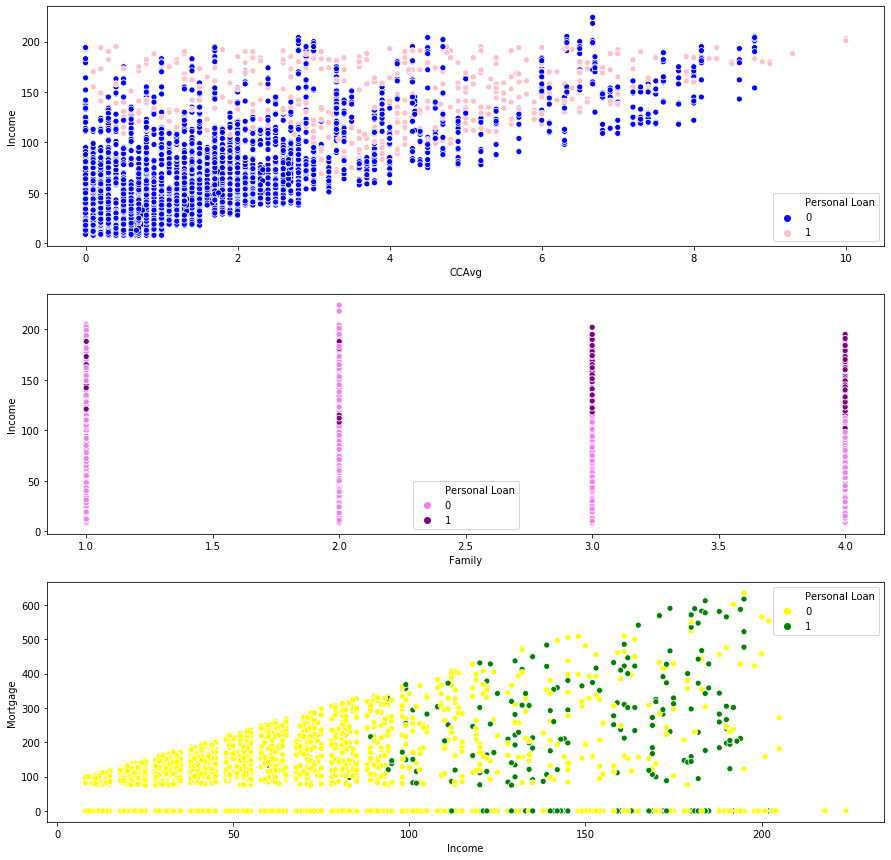

In [154]:
#Try to see how is the relationship of each feature with target variable
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.CCAvg, df.Income, hue = df['Personal Loan'], palette= ['blue','pink'])

plt.subplot(3,1,2)
sns.scatterplot(df.Family, df.Income, hue = df['Personal Loan'], palette= ['violet','purple'])

plt.subplot(3,1,3)
sns.scatterplot(df.Income, df.Mortgage, hue = df['Personal Loan'], palette= ['yellow','green']);

In [152]:
 #Use different plots, groupby or crosstabs if necessary
df.groupby(['Family','Income','CCAvg'])['Personal Loan'].value_counts()


Family  Income  CCAvg  Personal Loan
1       8       0.1    0                1
                0.3    0                2
                0.4    0                2
                0.5    0                1
                0.8    0                1
                                       ..
4       191     5.6    1                1
        194     0.2    1                1
                8.3    1                1
        195     3.0    1                1
                5.2    1                1
Name: Personal Loan, Length: 3634, dtype: int64

#### Analysis
#### The graph show persons who have personal loan have a higher credit card average.
#### It is clearly visible that as the members of family increases (say >=3) the necessity of loan is also increasing.
##### It is very precise that as the income increases (approx 100K) the mortgage value also increases gradually with the necessity of personal loan.

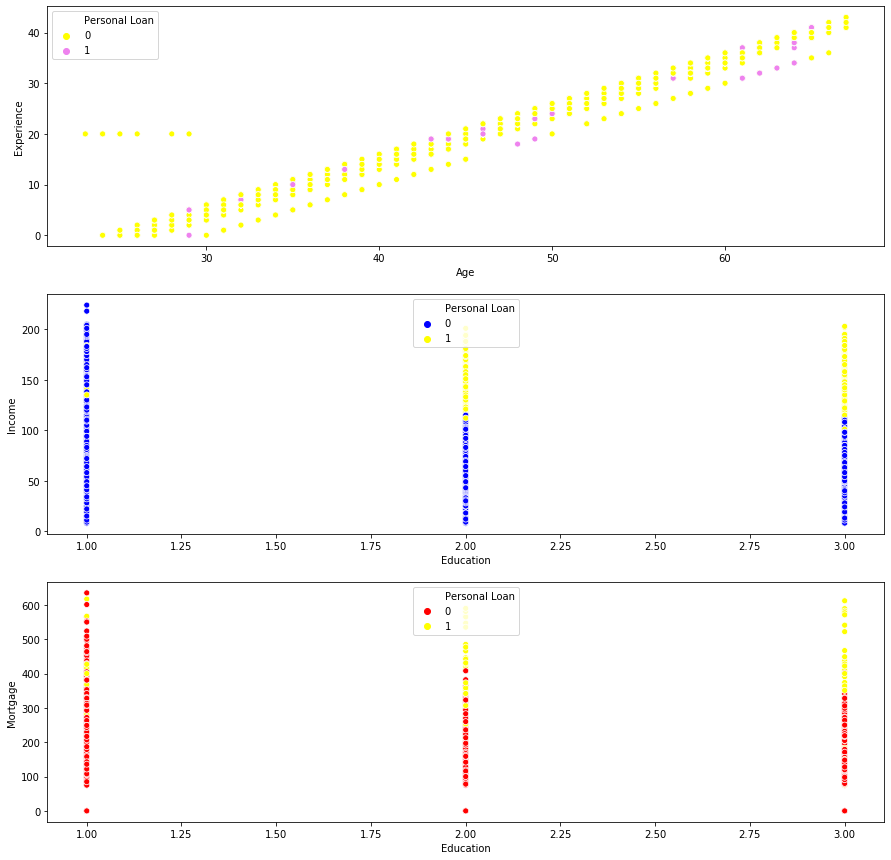

In [21]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.Age, df.Experience, hue = df['Personal Loan'], palette= ['yellow','violet'])

plt.subplot(3,1,2)
sns.scatterplot(df.Education, df.Income, hue = df['Personal Loan'], palette= ['blue','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(df.Education, df.Mortgage, hue = df['Personal Loan'], palette= ['red','yellow']);

#### Observation 
#### 'Age' has a very strong association with 'Experience' but nothing gets affected with loan attribute. 
#### It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan. Customers with education level 2 & 3 seems to take personal loan as they have high mortgage.

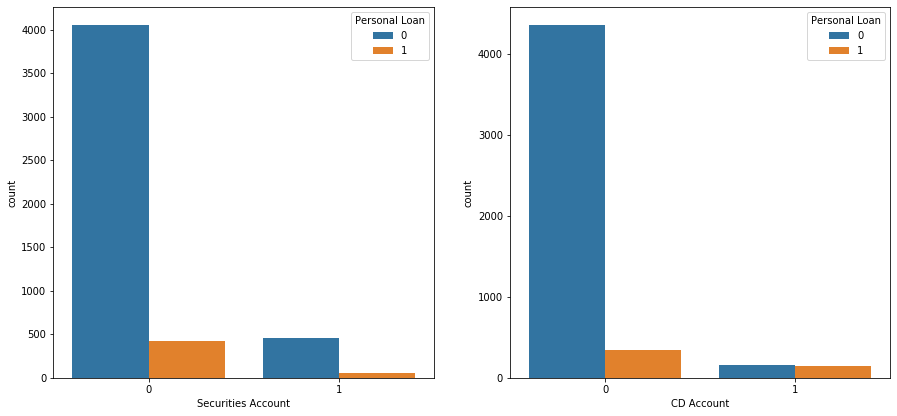

In [27]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=df ,hue='Personal Loan');

#### Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
#### Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well.

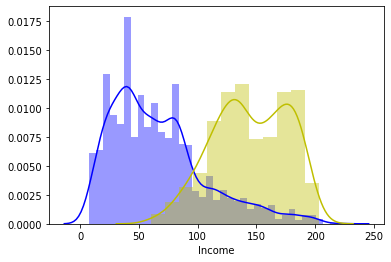

In [28]:
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'blue')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y');

#### The graph show those who have personal loan also have a higher income.

In [30]:
# Corelation
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


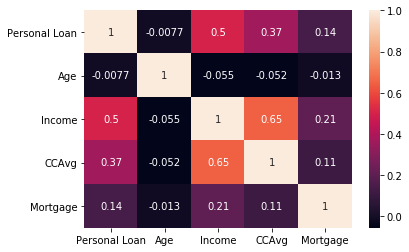

In [32]:
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True);

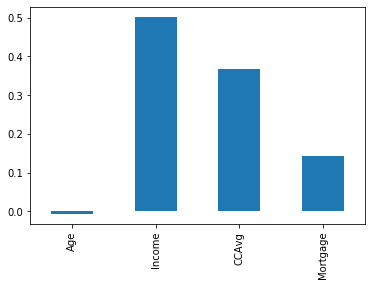

In [33]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar();

In [39]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


#### The above diagram shows a clear vision on the correlation between the independant variable and dependant variables, we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

## 3.Split the data into training and test set in the ratio of 70:30 respectively (5marks)

In [34]:
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [35]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [41]:
print('X_train shape:', train_set.shape) # Print shape of data
print('y_train shape:', train_labels.shape)
print('X_test shape:', test_set.shape)
print('Y_test shape:', test_labels.shape)

X_train shape: (3500, 11)
y_train shape: (3500,)
X_test shape: (1500, 11)
Y_test shape: (1500,)


In [38]:
train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

## 4.Use  Logistic  Regressionmodel  to  predict whether the customer will  take  personal  loan  or not. Print all the metrics related for evaluating the model performance (15marks)

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predict = logmodel.predict(X_Test)
predictProb = logmodel.predict_proba(X_Test)

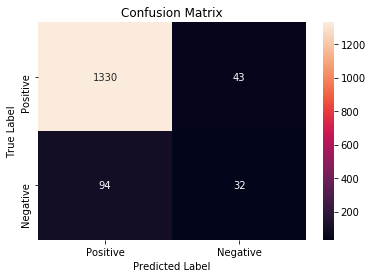

In [52]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1373
           1       0.43      0.25      0.32       126

    accuracy                           0.91      1499
   macro avg       0.68      0.61      0.63      1499
weighted avg       0.89      0.91      0.90      1499



In [59]:
# Roc Auc Curve
print("Roc Auc Score:",roc_auc_score(Y_Test, predict))


Roc Auc Score: 0.611324986416028


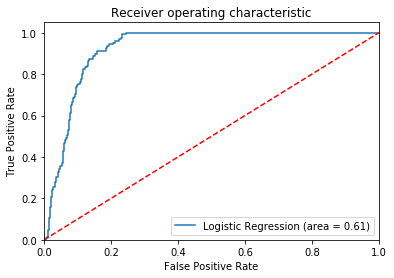

In [63]:
#AUC ROC curve
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_Test, logmodel.predict(X_Test))
fpr, tpr, thresholds = roc_curve(Y_Test, logmodel.predict_proba(X_Test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 5.Give your reasoning on how can the model perform better? (10 marks) Hint:Check parameter


In [ ]:
#The aim of the Thera Bank is to convert there liability customers into loan customers.
#They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.
#Three classification algorithms were used in this study.
#From the above graph , it seems like 'Logistic Regression' algorithm have the highest accuracy and we can choose that as our final model

In [64]:
# Checking Parameters of logistic regression
logmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [65]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_Train, Y_Train) 
    Y_predict = model.predict(X_Test)     
    train_score.append(round(model.score(X_Train, Y_Train),3))
    test_score.append(round(model.score(X_Test, Y_Test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.951, 0.906, 0.906, 0.899, 0.899]

[0.952, 0.909, 0.908, 0.916, 0.916]


In [66]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_Train, Y_Train) 
    Y_predict = model.predict(X_Test)     
    train_score.append(round(model.score(X_Train, Y_Train),3))
    test_score.append(round(model.score(X_Test, Y_Test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.951, 0.899]

[0.953, 0.916]


In [67]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'
# choose any one
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_Train, Y_Train) 

Y_predict = model.predict(X_Test)     

print("Trainig accuracy",model.score(X_Train,Y_Train))  
print()
print("Testing accuracy",model.score(X_Test, Y_Test))

Trainig accuracy 0.8911428571428571

Testing accuracy 0.8912608405603736


In [ ]:
## Testing accuracy increased and model is not overfit anymore so adding class weight from the model, 

In [72]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_Train, Y_Train)
Y_predict = model.predict(X_Test)
print("Trainig accuracy",model.score(X_Train,Y_Train))  
print()
print("Testing accuracy",model.score(X_Test, Y_Test))
print()
print('Confusion Matrix')
print(df_cm)
print()
print(classification_report(Y_Test, predict))
print("Roc Auc Score:",roc_auc_score(Y_Test,Y_predict))

Trainig accuracy 0.892

Testing accuracy 0.8945963975983989

Confusion Matrix
          Positive  Negative
Positive      1330        43
Negative        94        32

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1373
           1       0.43      0.25      0.32       126

    accuracy                           0.91      1499
   macro avg       0.68      0.61      0.63      1499
weighted avg       0.89      0.91      0.90      1499

Roc Auc Score: 0.9100249713869525


## 6.Give Business understanding of your model? (5 marks)

Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.

Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.

Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.